In [1]:
import time
import nest
import network
import addons
import helpers
import random
import numpy as np
import pandas as pd 
from network_params import net_dict
from sim_params import sim_dict
from stimulus_params import stim_dict
from scipy.stats import pearsonr

time_start = time.time()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.rcParams.update({'font.size': 20})
color = ['darkred', 'aqua', 'blue', 'aqua', 'green', 'lime', 'orange', 'moccasin','yellow','green']

names_rates = [0,1,2,3,4,5,6,7,8,9]

pop_activity = {}
names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I","THC","THI"]

for i in range(len(names_rates)):
       pop_activity[names[i]] = np.loadtxt(addons.analysis_dict["name"]+"/pop_activities/pop_activity_"+str(names_rates[i])+".dat")



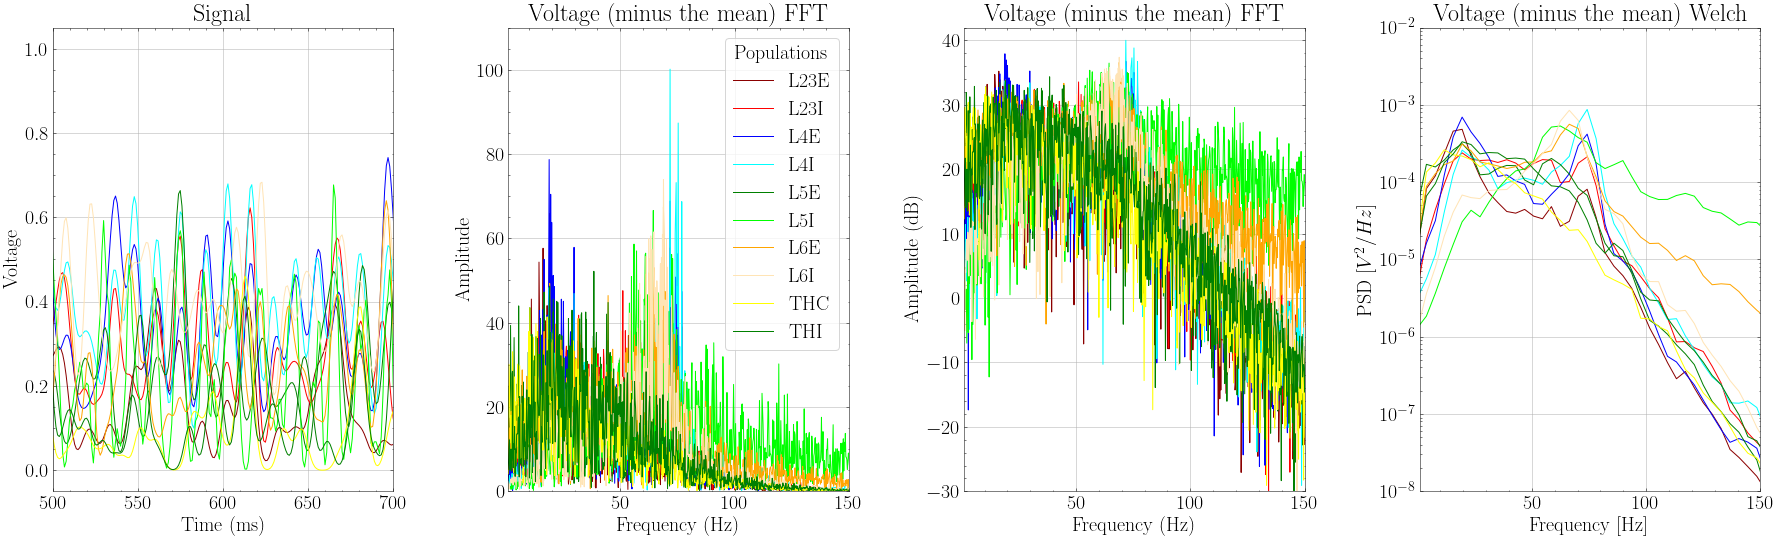

In [3]:
addons.compute_FFT(pop_activity,lim_y=110,high_log=42,low_log=-30,freq_sample=0.001,save=False,lim_x = 150)

### Analysis of the effect of varying the neuron's refractory period


- Looking at the firing rate

- Looking at the mean and std of frequencies for the gamma and alpha filtered signals

- Looking at the synchrony and irregularity measurement

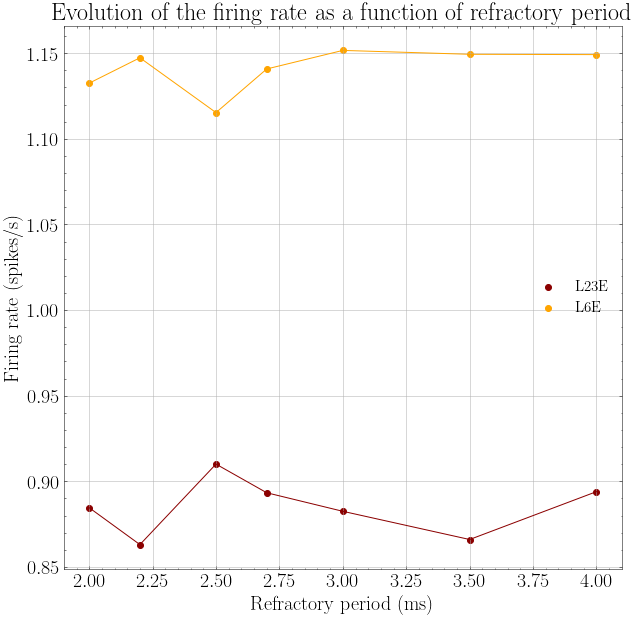

In [102]:
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.rcParams.update({'font.size': 20})
names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
color = ['darkred', 'aqua', 'blue', 'aqua', 'green', 'lime', 'orange', 'moccasin']

names_rates = [2.0,2.2,2.5,2.7,3.0,3.5,4.0]

rates = np.zeros((len(names_rates),len(names)))
std = np.zeros((len(names_rates),len(names)))

for i in range(len(names_rates)):
    if i==0:
        rates[i][:] = np.loadtxt('bg_8/mean_rate.dat')
        std[i][:] = np.loadtxt('bg_8/std_rate.dat')
    else:
        rates[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/mean_rate.dat")
        std[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/std_rate.dat")
rates = np.transpose(rates)
std = np.transpose(std)


plt.figure(figsize=(10,10))

for i in [0,6]:
    plt.scatter(names_rates,rates[i][:],label=names[i],color=color[i])
    plt.plot(names_rates,rates[i][:],color=color[i])

plt.xlabel('Refractory period (ms)')
plt.ylabel("Firing rate (spikes/s)")
plt.legend(fontsize=15)
plt.grid()
#plt.ylim(0.5,1.5)
plt.title("Evolution of the firing rate as a function of refractory period")
plt.show()

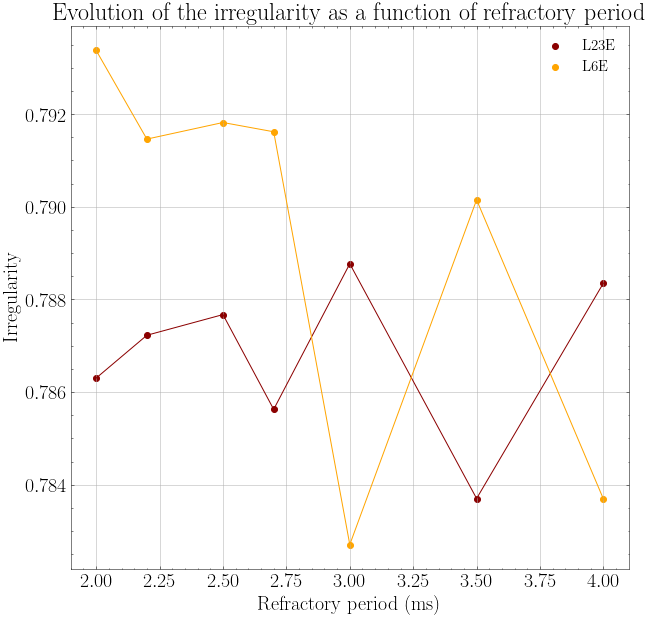

In [104]:
import matplotlib.pyplot as plt 
names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]

names_rates = [2.0,2.2,2.5,2.7,3.0,3.5,4.0]

irregularities = np.zeros((len(names_rates),len(names)))
synchrony = np.zeros((len(names_rates),len(names)))

for i in range(len(names_rates)):
    if i==0:
        irregularities[i][:] = np.loadtxt('bg_8/irregularity.dat')
        synchrony[i][:] = np.loadtxt('bg_8/synchrony.dat')
    else:
        irregularities[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/irregularity.dat")
        synchrony[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/synchrony.dat")
irregularities = np.transpose(irregularities)
synchrony = np.transpose(synchrony)


plt.figure(figsize=(10,10))

for i in[0,6]:
    plt.scatter(names_rates,irregularities[i][:],label=names[i],color=color[i])
    plt.plot(names_rates,irregularities[i][:],color=color[i])

plt.xlabel('Refractory period (ms)')
plt.ylabel("Irregularity")
plt.legend(fontsize=15)
plt.grid()
#plt.ylim(0.5,1.5)
plt.title("Evolution of the irregularity as a function of refractory period")
plt.show()

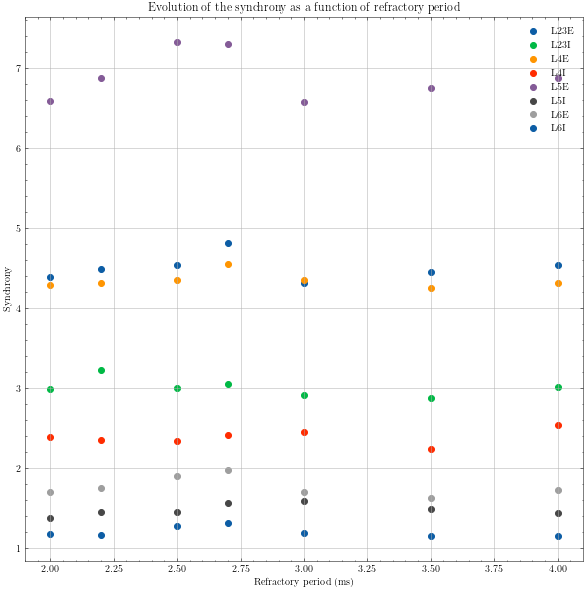

In [76]:
plt.figure(figsize=(10,10))

for i in range(len(names)):
    plt.scatter(names_rates,synchrony[i][:],label=names[i])

plt.xlabel('Refractory period (ms)')
plt.ylabel("Synchrony")
plt.legend()
plt.grid()
#plt.ylim(0.5,1.5)
plt.title("Evolution of the synchrony as a function of refractory period")
plt.show()

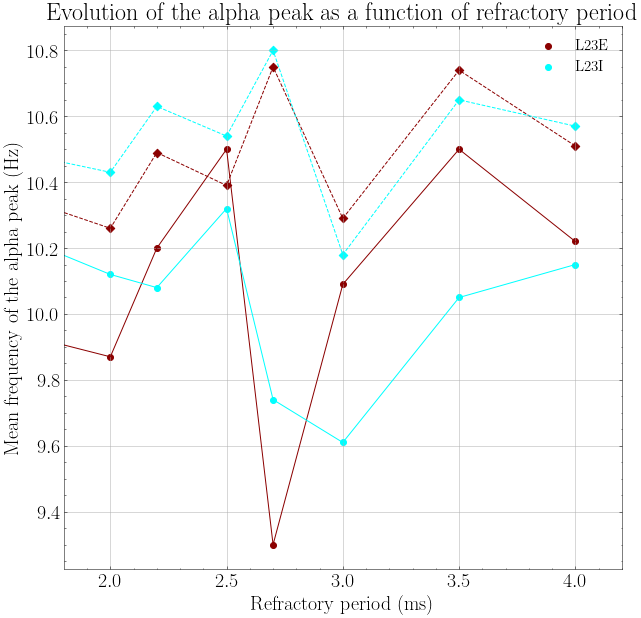

In [98]:
import matplotlib.pyplot as plt 
names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
color = ['darkred', 'aqua', 'blue', 'aqua', 'green', 'lime', 'orange', 'moccasin']


names_rates = [0.0,1.0,2.0,2.2,2.5,2.7,3.0,3.5,4.0]

freq_gamma = np.zeros((len(names_rates),len(names)))
freq_gamma_pop = np.zeros((len(names_rates),len(names)))

freq_alpha = np.zeros((len(names_rates),len(names)))
freq_alpha_pop = np.zeros((len(names_rates),len(names)))

for i in range(len(names_rates)):
    if i==2:
        freq_gamma[i][:] = np.loadtxt('bg_8/freq_gamma.dat',skiprows=1,usecols=1)
        freq_gamma_pop[i][:] = np.loadtxt('bg_8/freq_pop_gamma.dat',skiprows=1,usecols=1)
        freq_alpha[i][:] = np.loadtxt('bg_8/freq_alpha.dat',skiprows=1,usecols=1)
        freq_alpha_pop[i][:] = np.loadtxt('bg_8/freq_pop_alpha.dat',skiprows=1,usecols=1)
    else:
        freq_gamma[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/freq_gamma.dat",skiprows=1,usecols=1)
        freq_gamma_pop[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/freq_pop_gamma.dat",skiprows=1,usecols=1)
        freq_alpha[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/freq_alpha.dat",skiprows=1,usecols=1)
        freq_alpha_pop[i][:] = np.loadtxt('bg_8_delay_'+str(names_rates[i])+"/freq_pop_alpha.dat",skiprows=1,usecols=1)

freq_alpha = np.transpose(freq_alpha)
freq_alpha_pop = np.transpose(freq_alpha_pop)

freq_gamma = np.transpose(freq_gamma)
freq_gamma_pop = np.transpose(freq_gamma_pop)

plt.figure(figsize=(10,10))

for i in range(len(names)-6):
    plt.scatter(names_rates,freq_alpha[i][:],label=names[i], color=color[i])
    plt.scatter(names_rates,freq_alpha_pop[i][:], marker = 'D',color=color[i])
    plt.plot(names_rates,freq_alpha[i][:],color=color[i])
    plt.plot(names_rates,freq_alpha_pop[i][:], '--', color=color[i])

plt.xlabel('Refractory period (ms)')
plt.ylabel("Mean frequency of the alpha peak (Hz)")
plt.legend(fontsize=15)
plt.grid()
#plt.ylim(0.5,1.5)
plt.xlim(1.8,4.2)
plt.title("Evolution of the alpha peak as a function of refractory period")
plt.show()

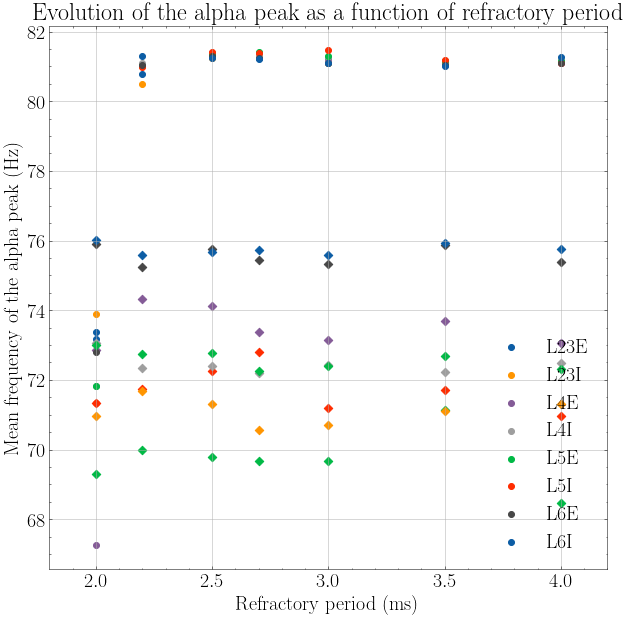

In [88]:
plt.figure(figsize=(10,10))

for i in range(len(names)):
    plt.scatter(names_rates,freq_gamma[i][:],label=names[i])
    plt.scatter(names_rates,freq_gamma_pop[i][:], marker = 'D')

plt.xlabel('Refractory period (ms)')
plt.ylabel("Mean frequency of the alpha peak (Hz)")
plt.legend()
plt.grid()
#plt.ylim(0.5,1.5)
plt.xlim(1.8,4.2)
plt.title("Evolution of the alpha peak as a function of refractory period")
plt.show()